# 第3章　分類問題
**投稿日：2022年01月04日<br>最終更新日：2022年01月04日**

この章では教師あり学習の分類問題を扱う。scikit-learnのデータセットを使用して分類器を学習し評価する一通りの流れを確認する。

## データセットの読み込みと分割

scikit-learnにはデータセットが同梱されている（[7. Dataset loading utilities — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/datasets.html)）。ここでは手書き数字データセットを使用する。0～9の数字のうち3と8の数字を利用する。データセットの60％を訓練データに、40％をテストデータにする。

`sklearn.datasets`の`load_digits`を`digits_data`としてインスタンス化する。

In [1]:
from sklearn.datasets import load_digits
digits_data = load_digits()

`digits_data`の形式を確認する。形式は(n_samples, n_features)である。

In [2]:
digits_data.data.shape

(1797, 64)

1枚の手書き数字を表示する。8×8のモノクロ画像である。

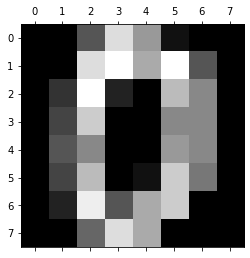

In [3]:
import matplotlib.pyplot as plt
plt.matshow(digits_data.images[0], cmap="gray")
plt.show()

scikit-learnにはデータセットを分割する`train_test_split`関数が用意されている。ここでは数字の3と8の画像を利用する。

In [4]:
from sklearn.model_selection import train_test_split

flag_3_8 = (digits_data.target == 3) + (digits_data.target == 8)
X_train, X_test, y_train, y_test = train_test_split(digits_data.data[flag_3_8],
                                                    digits_data.target[flag_3_8],
                                                    test_size=0.4,
                                                    random_state=1)
y_train

array([3, 3, 3, 8, 8, 3, 3, 3, 3, 8, 8, 3, 8, 3, 3, 8, 8, 8, 3, 3, 8, 8,
       3, 8, 8, 8, 3, 8, 8, 8, 8, 3, 8, 8, 3, 8, 8, 3, 8, 8, 8, 3, 3, 8,
       8, 8, 3, 8, 8, 8, 3, 3, 8, 8, 8, 8, 3, 8, 3, 3, 8, 3, 3, 3, 8, 8,
       8, 3, 8, 8, 3, 8, 8, 8, 3, 3, 3, 3, 8, 8, 3, 8, 3, 3, 3, 3, 3, 8,
       3, 3, 3, 8, 3, 3, 3, 3, 3, 8, 8, 3, 3, 3, 8, 3, 8, 8, 3, 3, 3, 3,
       3, 8, 8, 3, 8, 3, 8, 3, 3, 8, 3, 3, 3, 8, 8, 8, 3, 8, 8, 3, 3, 3,
       3, 3, 8, 8, 8, 8, 3, 3, 8, 3, 8, 8, 8, 3, 3, 3, 8, 8, 3, 8, 8, 8,
       8, 3, 8, 8, 3, 8, 8, 3, 8, 8, 3, 3, 8, 8, 8, 3, 8, 3, 8, 8, 8, 8,
       3, 3, 3, 3, 8, 3, 8, 8, 3, 8, 8, 8, 8, 3, 8, 3, 3, 8, 8, 3, 8, 3,
       3, 8, 8, 8, 8, 8, 3, 8, 8, 3, 8, 8, 8, 3, 8, 3])

訓練データとテストデータのサンプル数を確認する。

In [5]:
X_train.shape, X_test.shape

((214, 64), (143, 64))

## 色々な分類器

分類器にはscikit-learnに実装されている決定木、ランダムフォレスト、AdaBoost、サポートベクターマシンを使用する。

**決定木**<br>
決定木の最大の深さは`max_depth=3`とした。

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train, y_train)
print(f"　訓練データ正解率{tree.score(X_train, y_train)}")
print(f"テストデータ正解率{tree.score(X_test, y_test)}")

　訓練データ正解率0.985981308411215
テストデータ正解率0.951048951048951


**ランダムフォレスト**<br>
アンサンブルに用いる決定木の数は`n_estimators=20`とし、個々の決定木の最大深さは`max_depth=3`とした。

In [7]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20,
                                       max_depth=3,
                                       random_state=1)
random_forest.fit(X_train, y_train)
print(f"　訓練データ正解率{random_forest.score(X_train, y_train)}")
print(f"テストデータ正解率{random_forest.score(X_test, y_test)}")

　訓練データ正解率0.9953271028037384
テストデータ正解率0.9790209790209791


**AdaBoost**<br>
アンサンブルに用いる学習器は決定木を指定している（`base_estimator=estimator`）。決定木の数は`n_estimators=20`とし、個々の決定木の最大深さは`max_depth=3`とした。

In [8]:
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier(max_depth=3, random_state=1)
adaboost = AdaBoostClassifier(base_estimator=estimator,
                              n_estimators=20,
                              random_state=1)
adaboost.fit(X_train, y_train)
print(f"　訓練データ正解率{adaboost.score(X_train, y_train)}")
print(f"テストデータ正解率{adaboost.score(X_test, y_test)}")

　訓練データ正解率1.0
テストデータ正解率0.9790209790209791


**サポートベクターマシン**<br>
どの程度誤分類を許容するかを表すペナルティパラメータは`C=1.0`とし、分類曲面の複雑度を表すパラメータは`gamma=0.001`（ほぼ平面）とした。

In [9]:
from sklearn.svm import SVC

support_vector_machine = SVC(C=1.0, gamma=0.001, random_state=1)
support_vector_machine.fit(X_train, y_train)
print(f"　訓練データ正解率{support_vector_machine.score(X_train, y_train)}")
print(f"テストデータ正解率{support_vector_machine.score(X_test, y_test)}")

　訓練データ正解率1.0
テストデータ正解率1.0


## 評価指標

ここでは2クラス分類問題における混同行列、正解率、適合率、再現率、F値を説明する。混同行列と正解率は多クラス分類問題でも使用できる。

**混同行列（confusion matrix）**<br>
2クラス分類問題において、2種類のラベルのうち注目しているラベルを陽性（Positive）クラスとよび、もう一方のラベルを陰性（Negative）クラスとよぶ。例えば、病気の検査の陽性（病気である）と陰性（病気ではない）を考える。病気の検査で注目されるのは陽性である。検査で陽性となれば、さらなる精密検査を行うだろう。

実際は陰性クラスであるものを陰性と判定することをTrue Negative（TN）、実際は陰性クラスであるものを陽性と判定することをFalse Positive（FP）、実際は陽性クラスであるものを陰性と判定することをFalse Negative（FN）、実際は陽性クラスであるものを陽性と判定することをTrue Positive（TP）とよぶ。これらTN、FP、FN、TPを表にまとめたものを混同行列とよぶ。

```{image} 混同行列.svg
:align: center
:width: 350px
```

<!--
<img src="混同行列.svg" width="300px">
-->
訓練済みの決定木の混同行列を実際に表示してみる。ここでの例では8が陽性クラスに対応している。

In [13]:
from sklearn.metrics import confusion_matrix

y_predict = tree.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[78  5]
 [ 2 58]]


**正解率（accuracy）**<br>
正解率は次のように計算される。
\begin{gather*}
正解率 = \frac{TP + TN}{TP + TN + FP + FN}
\end{gather*}
ラベル間のサンプル数に大きな偏りがある場合、正解率は適切な評価指標とは言えない。

**適合率（precision）、再現率（recall）**<br>
適合率と再現率は次のように計算される。
\begin{gather*}
適合率 = \frac{TP}{TP + FP} \\
再現率 = \frac{TP}{TP + FN}
\end{gather*}
適合率は陽性と判定したもののうち実際に陽性であった割合である。再現率は実際に陽性であるもののうち陽性と判定できた割合である。適合率と再現率の最適化はトレードオフの関係があり、一方の評価指標を向上させようとするともう一方は低下する。

**F値（f-score）**<br>
F値は次のように計算される。
\begin{gather*}
F値 = 2 \times \frac{適合率 \times 再現率}{適合率 + 再現率}
\end{gather*}
F値は適合率と再現率の双方を取り入れた評価指標である。

正解率、適合率、再現率、F値は`sklearn.metrics`に含まれる`accuracy_score`、`precision_score`、`recall_score`、`f1_score`により求めることができる。ここでは、これらの評価指標をまとめて表示する`classification_report`を用いて訓練済みの決定木の評価を行う。

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, digits=6))

              precision    recall  f1-score   support

           3   0.975000  0.939759  0.957055        83
           8   0.920635  0.966667  0.943089        60

    accuracy                       0.951049       143
   macro avg   0.947817  0.953213  0.950072       143
weighted avg   0.952189  0.951049  0.951195       143



それぞれのクラスを陽性とした場合の適合率、再現率、Ｆ値を表示している。supportはそれぞれのクラスのサンプル数を表している。macro avgは単純に平均したものを表し、weighted avgはサンプル数を考慮した平均を表している。